# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_02_002
## Геометричні перетворення. Масштабування. Обертання

In [14]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

#### Формування найпростішого зображення

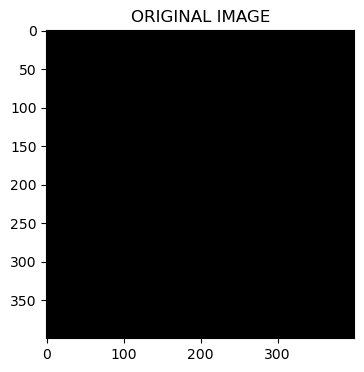

In [15]:
rows_num = 400 ## кількість рядків
clms_num = 400 ## кількість колонок
main_im_fon = np.zeros ((rows_num, clms_num, 3), dtype=np.uint8)
main_im =  main_im_fon.copy()
## 
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('ORIGINAL IMAGE')
plt.imshow(main_im)
plt.show()

#### Формування "білого" квадрату

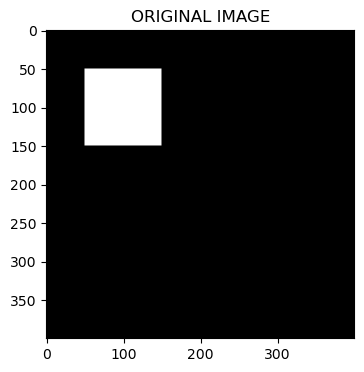

In [16]:
Point_1 = np.array ([50,  50, 0])
Point_2 = np.array ([50, 150, 0])
Point_3 = np.array ([150,150, 0])
Point_4 = np.array ([150, 50, 0])

for i in  range (Point_1[0], Point_3[0], 1):
    for j in  range (Point_4[1], Point_3[1], 1):
        main_im [i, j, : ] = [255, 255, 255]

fig, ax = plt.subplots(figsize=(4, 4))
plt.title('ORIGINAL IMAGE')
plt.imshow(main_im)
plt.show()


####  Масштабування !!! s = 2.5

In [17]:
# Формування матрицы масштабування
s = 2.5
main_im_scale =  main_im_fon.copy()
S = np.matrix (
    [[s, 0, 1],
     [0, s, 1],
     [0, 0, 1]]) 
print ('МАТРИЦЯ  МАСШТАБУВАННЯ\n', S)


МАТРИЦЯ  МАСШТАБУВАННЯ
 [[2.5 0.  1. ]
 [0.  2.5 1. ]
 [0.  0.  1. ]]


#### Перетворюємо  (МАСШТАБУЄМО) кутові пікселі

In [19]:
Point_1_new = S.dot(Point_1)
Point_2_new = S.dot(Point_2)
Point_3_new = S.dot(Point_3)
Point_4_new = S.dot(Point_4)
print (Point_1_new,Point_2_new,Point_3_new,Point_4_new)

[[125. 125.   0.]] [[125. 375.   0.]] [[375. 375.   0.]] [[375. 125.   0.]]


#### Формуємо перетворене зображення

125 375


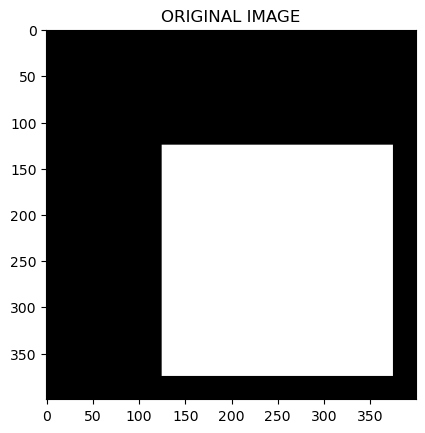

In [21]:
print (np.uint(Point_1_new[0,0]), np.uint(Point_3_new[0,0]))
for i in  range (np.uint(Point_1_new [0,0]), np.uint(Point_3_new[0,0]), 1):
    for j in  range (np.uint(Point_4_new [0,1]), np.uint(Point_3_new [0,1]), 1):
        main_im_scale [i, j, : ] = [255, 255, 255]
        
plt.title('ORIGINAL IMAGE')
plt.imshow(main_im_scale)
plt.show()


#### Повертання

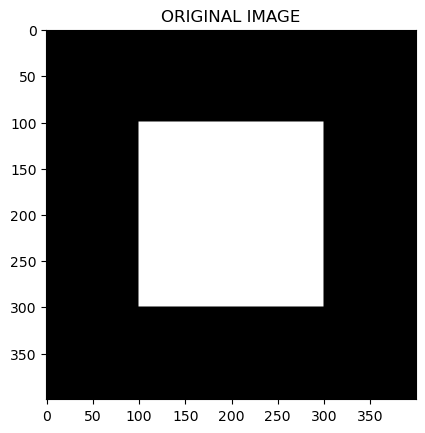

In [22]:
# Формируемо новий квадрат
Point_1_ = np.array ([100,  100, 0])
Point_2_ = np.array ([100,  300, 0])
Point_3_ = np.array ([300,  300, 0])
Point_4_ = np.array ([300,  100, 0])
Point_Center = np.array ([200,  200, 0])

main_im =  main_im_fon.copy()

for i in  range (Point_1_[0], Point_3_[0], 1):
    for j in  range (Point_4_[1], Point_3_[1], 1):
        main_im [i, j, : ] = [255, 255, 255]
        
plt.title('ORIGINAL IMAGE')
plt.imshow(main_im)
plt.show()


#### Повретання.  Формуємо матрицю

In [23]:
alfa_grad = 30 
alfa_rad  = np.pi/180*alfa_grad
print ('Кут повороту градус ',alfa_grad,'Кут повороту радіан',alfa_rad)
sin_alfa = np.sin(alfa_rad) ; cos_alfa = np.cos(alfa_rad) ; 
print ('SIN = ', sin_alfa,'COS = ',cos_alfa)

R = np.matrix (
    [[cos_alfa, -sin_alfa, 0],
     [sin_alfa, cos_alfa, 0],
     [0, 0,   1]]) 

print ('МАТРИЦЯ  ОБЕРТАННЯ \n', R)


Кут повороту градус  30 Кут повороту радіан 0.5235987755982988
SIN =  0.49999999999999994 COS =  0.8660254037844387
МАТРИЦЯ  ОБЕРТАННЯ 
 [[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


#### Обертання.  Перетворюємо кутові точки

In [24]:
Point_1_rot = R.dot(Point_1-Point_Center)+Point_Center
Point_2_rot = R.dot(Point_2-Point_Center)+Point_Center 
Point_3_rot = R.dot(Point_3-Point_Center)+Point_Center 
Point_4_rot = R.dot(Point_4-Point_Center)+Point_Center 

print (Point_1_rot,Point_2_rot,Point_3_rot,Point_4_rot)

[[145.09618943  -4.90381057   0.        ]] [[95.09618943 81.69872981  0.        ]] [[181.69872981 131.69872981   0.        ]] [[231.69872981  45.09618943   0.        ]]


#### Формуємо поернуте зображення

[[145.09618943  -4.90381057]
 [ 95.09618943  81.69872981]
 [181.69872981 131.69872981]
 [231.69872981  45.09618943]]


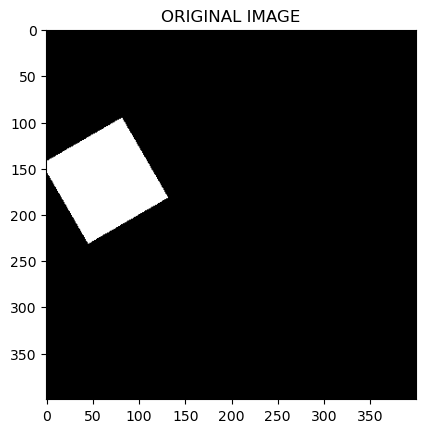

In [25]:
main_im_rotate =  main_im_fon.copy()
#img = np.zeros((500, 500, 3), dtype=np.double)

#poly = np.array([[300, 300], [480, 320], [380, 430], [220, 450], [300, 300]])
poly = np.array([[Point_1_rot[0,0], Point_1_rot[0,1]], 
                 [Point_2_rot[0,0], Point_2_rot[0,1]],
                 [Point_3_rot[0,0], Point_3_rot[0,1]],
                 [Point_4_rot[0,0], Point_4_rot[0,1]]])
print (poly)
rr, cc = polygon(poly[:, 0], poly[:, 1], main_im_rotate.shape)
main_im_rotate [rr, cc, :] = [255, 255,255]


plt.title('ORIGINAL IMAGE')
plt.imshow(main_im_rotate)
plt.show()